In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import optimize
import os

In [157]:
# Process the csv file and grab the cities
def process(csv_file, xlabel, ylabel):
    df = pd.read_csv(csv_file)
    ax.scatter(df['x'], df['y'])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return [df['x'], df['y']]

# Automatically graph the line (deprecated)
# def line(equation):
#     x = np.linspace(0,10,100)
#     y = eval(equation)
#     ax.plot(x, y, color="red", label="fitted line")
#     ax.legend()

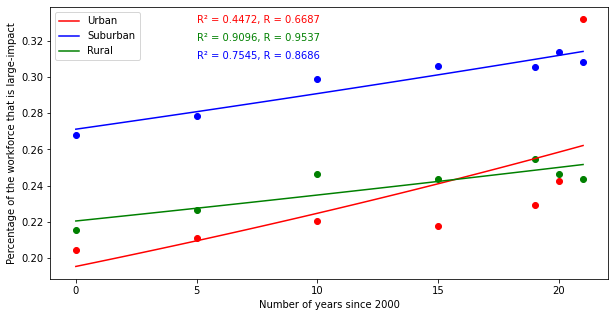

In [160]:
fig, ax = plt.subplots(figsize=(10,5))

# cities = process('cities.csv', 'years', 'percent')

# Example cities list:
cities = [["Urban", [0, 5, 10, 15, 19, 20, 21], [0.2047387524, 0.2111259059, 0.2203910303, 0.2179658165, 0.2294722617, 0.2425311627, 0.3318589061]], ["Suburban", [0, 5, 10, 15, 19, 20, 21], [0.2677751799, 0.278707945, 0.299046107, 0.3059464286, 0.3058205128, 0.3136300185, 0.308201132]], ["Rural", [0, 5, 10, 15, 19, 20, 21], [0.2152968701, 0.2264936669, 0.2462649326, 0.2435468118, 0.2548404718, 0.2464485981, 0.2438207509]]]



colors = ["red", "blue", "green"]


# Each equation has the coefficients, grabbed from an excel regression, ended up being faster than scipy.optimize and np.polyfit
equations = [[0.1954, 0.014], [0.2712, 0.007], [0.2205, 0.0063]]


# Populate graph with city types
for city, color, equation in zip(cities, colors, equations):
    ax.scatter(city[1], city[2], color=color)
    if (colors.index(color) == 0):
        polyline = np.linspace(min(city[1]), max(city[1]), 100)
    elif (colors.index(color) == 1):
        polyline = np.linspace(min(city[1]), max(city[1]), 100)
    else:
        polyline = np.linspace(min(city[1]), max(city[1]), 100)
    polyspace = equation[0] * np.exp(polyline * equation[1])
    ax.plot(polyline, polyspace, color=color, label=city[0])


# Add axis labels
ax.set_xlabel("Number of years since 2000")
ax.set_ylabel("Percentage of the workforce that is large-impact")

# R-squared values, also grabbed from an excel file because it was faster to grab them than to automate them
plt.text(5, 0.33, r'R² = 0.4472, R = 0.6687', color="red")
plt.text(5, 0.32, r'R² = 0.9096, R = 0.9537', color="green")
plt.text(5, 0.31, r'R² = 0.7545, R = 0.8686', color="blue")

# Put legend, save the image for use in the paper, and show the image
ax.legend()
currentwd = os.getcwd().replace('\\', '/')
plt.savefig(f"{currentwd}/cities/problem1.png", dpi=200)
plt.show()